In [9]:
# 加载 mnist 数据
from keras.datasets import mnist
# X_train 对应图像数据，y_train 对应标签
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [10]:
print(type(X_train), X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


Text(0.5, 1.0, '5')

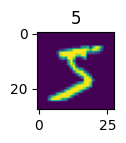

In [18]:
# 可视化部分数据
img1 = X_train[0]
%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(1,1))
plt.imshow(img1)
plt.title(y_train[0])

In [19]:
# 28行 28列维度的图
img1.shape

(28, 28)

In [26]:
# 格式化输入数据
feature_size = img1.shape[0]*img1.shape[1]

X_train_format = X_train.reshape(X_train.shape[0], feature_size)
X_test_format = X_test.reshape(X_test.shape[0], feature_size)
print( X_train_format.shape, X_test_format.shape)

(60000, 784) (10000, 784)


In [30]:
# 归一化
X_train_normal = X_train_format / 255
X_test_normal = X_test_format / 255

In [33]:
# 格式化输出数据
# 将 1 格式化为 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
# 将 2 格式化为 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train[0], y_train_format[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [40]:
# 建立神经元模型
from keras.models import Sequential
from keras.layers import Dense, Activation

mlp = Sequential()
mlp.add(Dense(units=392, activation='sigmoid',input_dim=feature_size))
mlp.add(Dense(units=392, activation='sigmoid'))
mlp.add(Dense(units=10, activation='softmax'))
mlp.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 392)               307720    
                                                                 
 dense_13 (Dense)            (None, 392)               154056    
                                                                 
 dense_14 (Dense)            (None, 10)                3930      
                                                                 
Total params: 465706 (1.78 MB)
Trainable params: 465706 (1.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# 配置模型
mlp.compile(loss='categorical_crossentropy', optimizer='adam')

In [42]:
# 训练模型
mlp.fit(X_train_normal, y_train_format, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3432
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1423
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0931
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0647
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0467
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0363
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0264
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0203
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0153
Epoch 10/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0135


In [66]:
# 模型评估
y_train_predict = mlp.predict(X_train_normal)
import numpy as np
y_train_predict= np.argmax(y_train_predict, axis=1)
y_train_predict

1875/1875 [==============================] - 6s 3ms/step


array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [67]:
# 计算准确率
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_train

0.99535

In [70]:
# 计算测试集
y_test_predict = mlp.predict(X_test_normal)
y_test_predict= np.argmax(y_test_predict, axis=1)
accuracy_train = accuracy_score(y_test, y_test_predict)
accuracy_train

313/313 [==============================] - 1s 3ms/step


0.9784

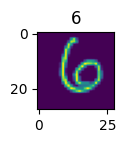

In [78]:
# 选几幅图进行展示：
img2 = X_test[100]
fig2 = plt.figure(figsize=(1,1))
plt.imshow(img2)
plt.title( y_test_predict[100])
plt.show()